# Ejercicio - Deep Learning


Vamos a implementar una red neuronal usando `tensorflow` y `keras`. En particular, implementaremos un perceptrón multicapa (MLP por sus siglas en inglés) para la classificación de dígitos del conjunto de datos MNIST.

## Dataset

Importamos el dataset de MNIST

In [1]:
from keras.datasets import mnist

# importamos el dataset desde keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"The MNIST database has a training set of {len(X_train)} examples.")
print(f"The MNIST database has a test set of {len(X_test)} examples.")

11490434/11490434 [==============================] - 0s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### Visualizamos algunos datos

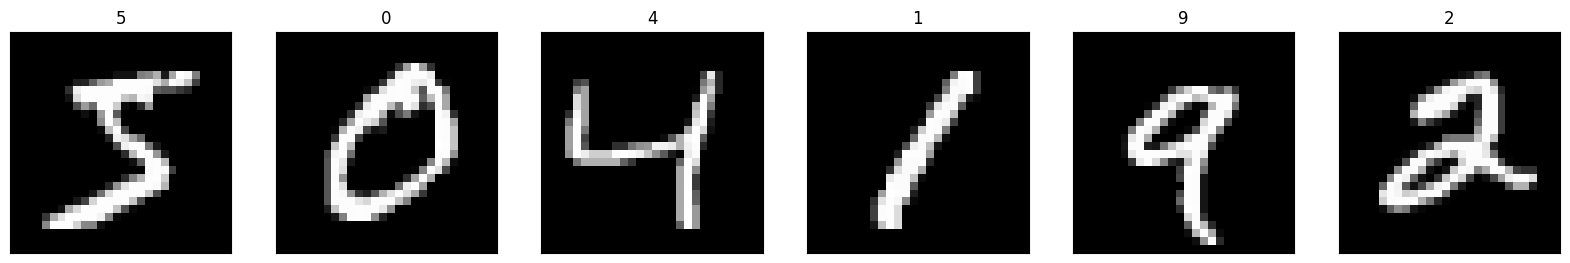

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot de las primeras 6 imagenes
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### Ahora vemos con más detalle los números de los pixels

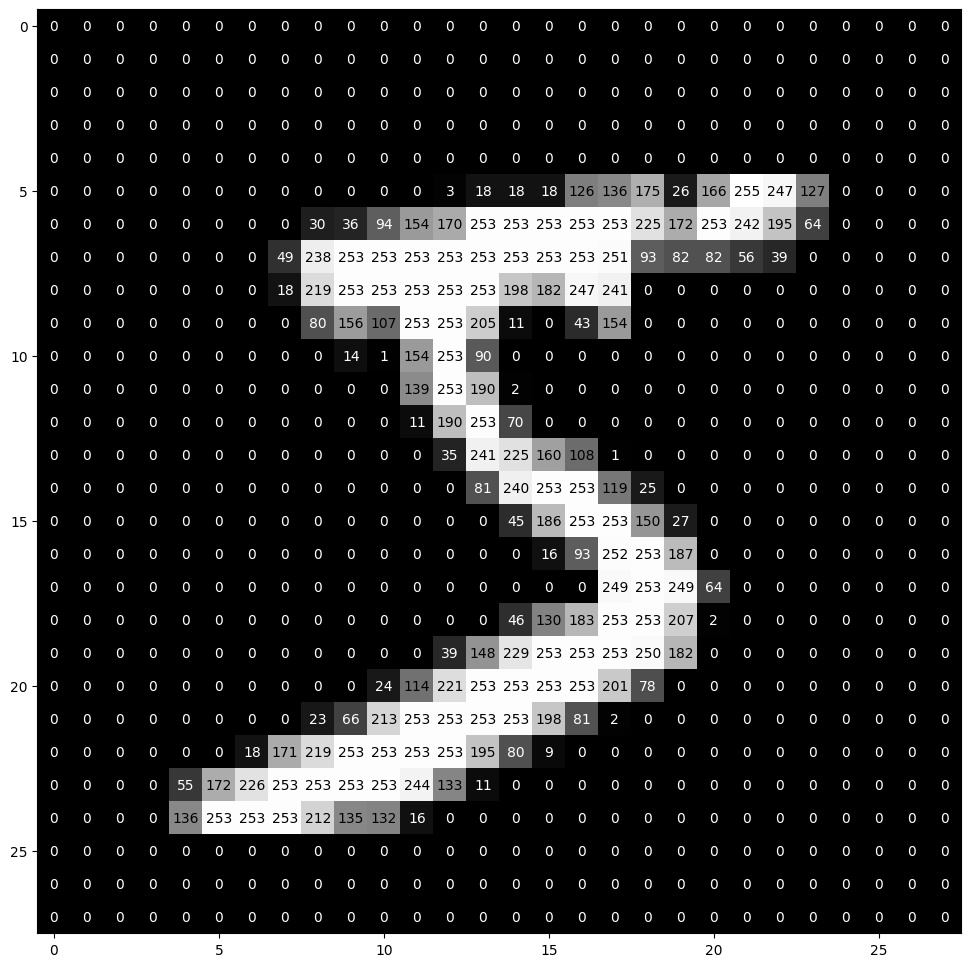

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### Preparamos los datos para entrenamiento

In [4]:
# Reescalado [0,255] --> [0,1]
# Queremos que los números estén entre 0 y 1

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

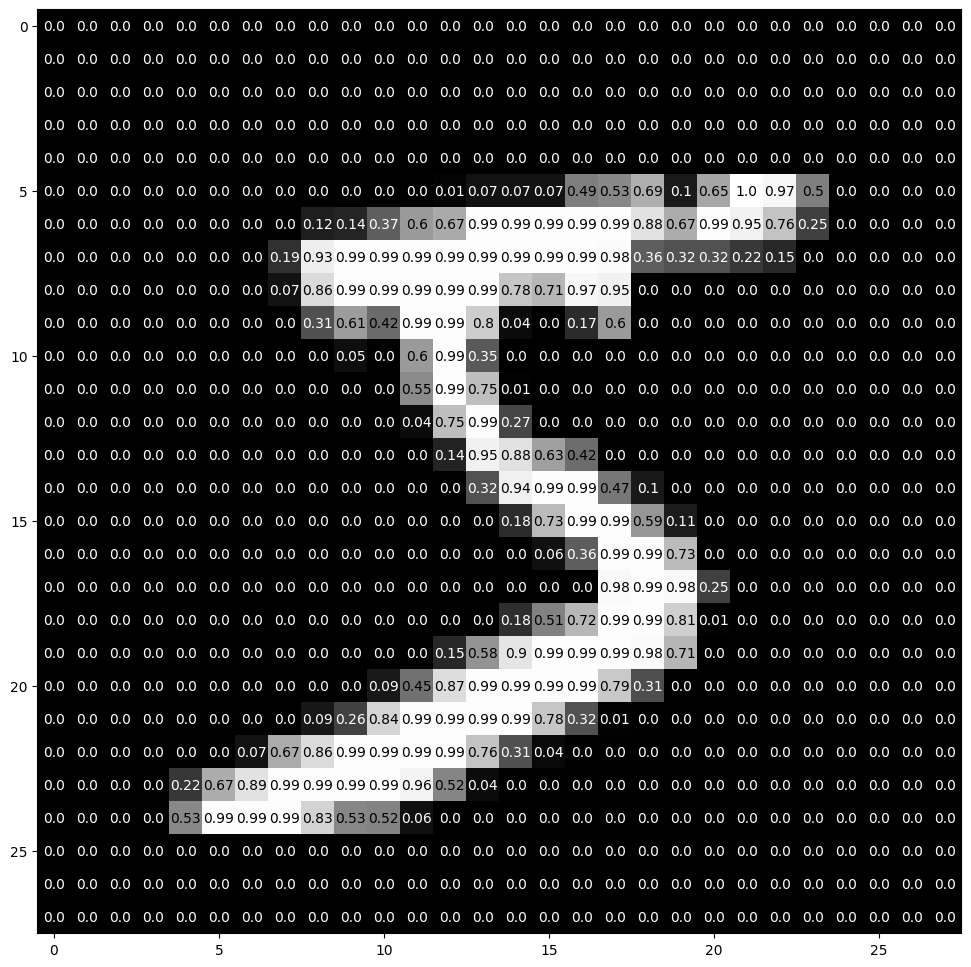

In [7]:
# Volvemos a visualizar con el reescalado
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

#### OHE para las categorías de los números

In [8]:
from keras.utils import to_categorical

# Imprime las categorías
print('Etiquetas:')
print(y_train[:10])

# one-hot encode
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Imprime las etiquetas con OHE
print('One-hot etiquetas:')
print(y_train[:10])

Etiquetas:
[5 0 4 1 9 2 1 3 1 4]
One-hot etiquetas:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Implementación de la red neuronal

Vamos a crear la red neuronal. Para eso vamos a definir las capas:

- Input layer: 784 nodos. (Tamaño de la imagen)
- Hidden layer 1: capa de 128 nodos, función de activación: RELU.
- Hidden layer 2: capa de 64 nodos, función de activación: RELU.
- Output Layer: 10 nodos para la salida con función softmax para las probabilidades.

El modulo que contiene las herramientas para crear la RN es `keras`. La red neuronal en sí se crea con `keras.models.Sequential`. Cada una de las capas de la red se define de forma independiente.

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
# Vemos las dimensionas del input
# Nos va a servir para determinar el tamaño de la input layer
print(X_train.shape)

(60000, 28, 28)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# TODO: completar con las dimensiones de las imagenes
input_shape_dimension = (..., ...)

# Definir el modelo
model = Sequential()
model.add(Flatten(input_shape=input_shape_dimension))
model.add(Dense(128, activation='relu'))
#TODO: completar con las dimensiones de las capas
model.add(Dense(..., activation='relu'))
model.add(Dense(..., activation='softmax'))

# Ver información del modelo
model.summary()

### Compilar el modelo

Tensorflow necesita compilar el modelo antes de entrenar. Para eso definimos la función de loss, un optimizador, y métricas.

La función de loss va a ser Categorical Crossentropy, que es una medida que sirve cuando clasificamos 2 o más categorías. Pueden leer más aca: https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy.

El optimizador es la implementación del descenso del gradiente que va a utilizar el modelo. Una común es `adam`, https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [ ]:
from keras import optimizers
optimizer = optimizers.Adam(learning_rate=0.001)

In [ ]:
# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# Imprime accuracy
print(f'Test accuracy: {accuracy}')

¿Es buena la accuracy? ¿Por qué?

### Entrenamiento

Llamamos al método `fit()` que entrena el modelo.

Se le pasa un parámetro `epochs` que es una cantidad de iteraciones fija para que termine el entrenamiento. Lógicamente, un número más chico limita el entrenamiento. Como nuestra red es chica, no es un problema.

In [ ]:
from keras.callbacks import ModelCheckpoint

# Entrenamiento
checkpointer = ModelCheckpoint(filepath='data/mnist.model.best.hdf5',
                               verbose=1, save_best_only=True)

#Se define el split de validación, y las epochs
hist = model.fit(X_train, y_train, batch_size=128, epochs=5,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

In [ ]:
# plot
import matplotlib.pyplot as plt
nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))

for idx, key in enumerate(['loss', 'accuracy']):
    ax = fig.add_subplot(nrows, ncols, idx+1)
    plt.plot(hist.history[key])
    plt.plot(hist.history['val_{}'.format(key)])
    plt.title('model {}'.format(key))
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left');

El entrenamiento guarda los pesos, que nos permite cargarlos para no volver a entrenar cada vez.

In [ ]:
model.load_weights('data/mnist.model.best.hdf5')

## Evaluar el modelo

In [ ]:
# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# Accuracy
print(f'Test accuracy: {accuracy}')

### Veamos las predicciones

In [ ]:
# Calculamos las predicciones en X_test
predicciones = model.predict(X_test)

In [ ]:
#TODO: elegir un índice para ver la predicción del modelo
indice = ... # Pueden probar cambiando para verlo en distintas imagenes

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.imshow(X_test[indice], cmap='gray')
ax.set_title(str(np.argmax(y_test[indice])))
plt.show()

print(f"Prediccion del modelo: {np.argmax(predicciones[indice])}")
index = 0
print("Probabilidades: ")
for prob in predicciones[indice]:
  print(f"    Prob de {index}: {np.round(prob,3)}")
  index+=1

In [ ]:
# Funcion de ayuda para imprimir predicciones
def plot_prediction_model(actual, prediction, images, prediction_type):
    fig = plt.figure(figsize=(20,20))

    if prediction_type == 'positive':
        display_set = np.argwhere(prediction == actual)
    elif prediction_type == 'negative':
        display_set = np.argwhere(prediction != actual)
    else:
        return

    for i in range(36):
        ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
        index = display_set[i]
        actual_image = images[index]
        actual_image = actual_image.reshape(28, 28)

        ax.imshow(actual_image, cmap='gray')
        ax.set_title(f'Actual: {actual[index]} \n Prediction: {prediction[index]}')

    plt.show()

In [ ]:
prediction = np.argmax(predicciones, axis=1)
actual = np.argmax(y_test, axis=1)
images = X_test.astype('float32') * 255

In [ ]:
# Imprime las predicciones CORRECTAS
plot_prediction_model(actual, prediction, images, 'positive')

### Veamos en dónde se confundió el modelo

In [ ]:
# Imprime predicciones INCORRECTAS
plot_prediction_model(actual, prediction, images, 'negative')

Si quieren prueben jugar cambiandole cosas al modelo!
Pueden experimentar:
- Agregando capas, cambiando las dimensiones.
- Cambiando parámetros del entrenamiento. ¿Qué pasa si cambian el `learning_rate`?
- Agregar más epochs y ver cómo quedan los gráficos